In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Multiobjective Evolutionary Algorithm Based on Decomposition (MOEA/D)

Consider the multiobjective optimization problem (MOP):

$$
\min f(x) = [f_1(x), f_2(x), \dots, f_m(x)]^T, \quad \text{subject to} \quad x \in \mathcal{X},
$$

where $ x = [x_1, x_2, \dots, x_n]^T $ is the decision vector, and $ \mathcal{X} $ is the decision space, and $ \mathbb{R}^m $ is the objective space. The vector $ f : \mathcal{X} \to \mathbb{R}^m $ consists of $ m $ real-valued objective functions. A point $ x^* \in \mathcal{X} $ is called globally Pareto optimal if there is no $ x \in \mathcal{X} $ such that $ f(x) $ dominates $ f(x^*) $, i.e., $ f_i(x) $ dominates $ f_i(x^*) $ for each $ i = 1, 2, \dots, m $. The set of all Pareto-optimal points is the Pareto set, and the set of all Pareto objective vectors, $ \mathcal{P}_F = \{ f(x) \in \mathbb{R}^m | x \in \mathcal{X} \} $, is called the Pareto front.

## Decomposition Approaches

### 1. Weighted Sum Approach:
Let $ \lambda = [\lambda_1, \lambda_2, \dots, \lambda_m]^T $ be a weight vector with $ \lambda_i \geq 0 $ for $ i = 1, 2, \dots, m $, and $ \sum_{i=1}^{m} \lambda_i = 1 $. The optimal solution to the scalar optimization problem is:

$$
\max g_{\text{ws}}(x | \lambda) = \sum_{i=1}^{m} \lambda_i f_i(x), \quad \text{subject to} \quad x \in \mathcal{X}.
$$

### 2. Tchebycheff Approach:
This approach transforms the MOP into the scalar optimization problem:

$$
\min g_{\text{tc}}(x | \lambda, z^*) = \max_{1 \leq i \leq m} \left( \lambda_i |f_i(x) - z_i^*| \right), \quad \text{subject to} \quad x \in \mathcal{X},
$$

where $ z^* = [z_1^*, z_2^*, \dots, z_m^*]^T $ is the reference point vector, and $ z_i^* = \max \{ f_i(x) | x \in \mathcal{X} \} $ for each $ i = 1, 2, \dots, m $.

### 3. Boundary Intersection (BI) Approach:
This approach solves the following scalar optimization subproblem:

$$
\min g_{\text{bi}}(x | \lambda, z^*) = d, \quad \text{subject to} \quad z^* - f(x) = d\lambda, \quad x \in \mathcal{X}.
$$

The goal of the constraint $ z^* - f(x) = d\lambda $ is to push $ f(x) $ as high as possible, reaching the boundary of the attainable objective set. A penalty method can be used to handle the equality constraint:

$$
\min g_{\text{bip}}(x | \lambda, z^*) = d_1 + \theta d_2, \quad \text{subject to} \quad x \in \mathcal{X},
$$

where $ \theta > 0 $ is a preset penalty parameter, and $ d_1 $ and $ d_2 $ are defined as follows:

$$
d_1 = \frac{(z^* - f(x))^T \lambda}{|\lambda|}, \quad d_2 = \left| f(x) - \left( z^* - d_1 \lambda \right) \right|.
$$

## MOEA/D Algorithm

### Algorithm 10: Multiobjective Evolutionary Algorithm Based on Decomposition (MOEA/D)

1. **Input:**
   - $ N $: the number of subproblems considered.
   - $ \lambda_1, \lambda_2, \dots, \lambda_N $: a set of $ N $ weight vectors.
   - $ T $: the number of weight vectors in the neighborhood of each weight vector.

2. **Initialization:**
   - Let the external Pareto-optimal set $ P = \emptyset $.
   - Compute $ d(i, j) = \|\lambda_i - \lambda_j\|_2 $ for $ i, j \in \{1, \dots, N\}, i \neq j $, and work out the $ T $ closest weight vectors to each weight vector. For each $ i $, set $ B(i) = \{\lambda_{i_1}, \dots, \lambda_{i_T}\} $, where $ \lambda_{i_1}, \dots, \lambda_{i_T} $ are the $ T $ closest weight vectors to $ \lambda_i $.
   - Generate an initial population $ x_1, \dots, x_N $ randomly or using a problem-specific method. Let $ f_i = f(x_i) $, and $ P = \{x_1, \dots, x_N\} $.
   - Initialize $ z = [z_1, \dots, z_k]^T $ by a problem-specific method.

3. **For each generation:**
   1. **Reproduction:** Randomly select two indices $ j $ and $ l $ from $B(i) $, and generate a new solution $ y $ from $ x_j $ and $ x_l $ using genetic operators.
   2. **Improvement:** Apply a problem-specific repair/improvement heuristic on $ y $ to produce $ y' $.
   3. **Update $ z $:** For each $ j = 1, \dots, k $, if $ z_j < f_j(y') $, then set $ z_j = f_j(y') $.
   4. **Generation:** For each index $ j \in B(i) $, if $ g_{\text{tc}}(y' | \lambda_j, z) \leq g_{\text{tc}}(x_j | \lambda_j, z) $, then let $ x_j = y' $ and update the neighboring solutions $ f_j = f(y') $.
   5. **Selection:** Remove all vectors dominated by $ f(y') $ from $ P $. Add $ f(y') $ to $ P $ if no vectors in $ P $ dominate $ f(y') $.

4. **Stopping criteria:** If the stopping criteria are satisfied, stop and output $ P $. Otherwise, go back to step 1.

5. **Output:** The external Pareto-optimal set $ P $.

### MOEA/D-DE Algorithm (MOEA/D with Differential Evolution)

MOEA/D-DE overcomes some shortcomings of MOEA/D by using differential evolution (DE) and polynomial mutation.

1. **Differential Evolution Operator:**
   - Generate a solution $ \bar{y} = [\bar{y}_1, \dots, \bar{y}_n]^T $ from three solutions $ x_{r1}, x_{r2}, x_{r3} $ selected randomly from $ P $ by the DE operator:

   $$
   \bar{y}_j = x_{r1,j} + F \cdot (x_{r2,j} - x_{r3,j}) \quad \text{with probability} \quad CR,
   $$

   where $ CR $ and $ F $ are control parameters.

2. **Polynomial Mutation Operator:**
   - Generate $ y = [y_1, \dots, y_n]^T $ from $ \bar{y} $ as follows:

   $$
   y_j = \bar{y}_j + \sigma_j (b_j - a_j) \quad \text{with probability} \quad pm,
   $$

   where $ \sigma_j $ is generated based on a uniform random number and a distribution index $ \eta $.

---

By using the Tchebycheff decomposition, MOEA/D solves the MOP by transforming it into a series of scalar optimization problems. Each problem is optimized independently using evolutionary strategies like crossover, mutation, and selection.



Pareto-optimal set found by MOEA/D:
[[36.11950274 16.07970149]
 [50.75522048 26.2581412 ]
 [53.26101156 28.06895468]
 [66.62648061 37.97646239]]


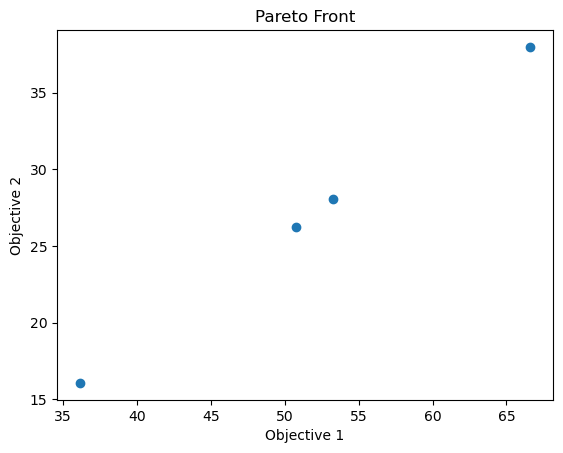

In [9]:
import numpy as np
import random
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels (not used in this case for optimization)

# Use the first two features for the multi-objective problem
X_obj = X[:, :2]  # Using the first two features (sepal length and sepal width)

# Define the problem (For illustration, using a simple multi-objective problem)
def objective_functions(x):
    # Example: Two-objective problem, f1(x) = x1^2, f2(x) = (x1-2)^2
    f1 = x[0] ** 2  # First feature squared
    f2 = (x[0] - 2) ** 2  # Second feature squared difference from 2
    return np.array([f1, f2])

# Tchebycheff approach to convert the MOP to a scalar optimization subproblem
def tchebycheff(x, lambda_vector, z_star):
    f = objective_functions(x)
    return np.max(lambda_vector * np.abs(f - z_star))

# Differential Evolution operator (crossover and mutation)
def differential_evolution(xr1, xr2, xr3, F, CR):
    y = np.copy(xr1)
    for i in range(len(xr1)):
        if random.random() < CR:
            y[i] = xr1[i] + F * (xr2[i] - xr3[i])
    return y

# Polynomial mutation
def polynomial_mutation(y, lb, ub, pm, eta):
    y_new = np.copy(y)
    for i in range(len(y)):
        if random.random() < pm:
            delta = (2 * random.random()) ** (1 / (eta + 1)) - 1
            y_new[i] = y[i] + delta * (ub[i] - lb[i])
            y_new[i] = np.clip(y_new[i], lb[i], ub[i])
    return y_new

# Initialize the population, weight vectors, and other parameters
def initialize_population(N, m, lb, ub):
    population = []
    for i in range(N):
        x = np.random.uniform(lb, ub, size=m)
        population.append(x)
    return np.array(population)

# Main MOEA/D algorithm
def moea_d(N, M, T, lambda_vectors, lb, ub, F=0.5, CR=0.9, pm=0.1, eta=20, max_iter=100):
    population = initialize_population(N, M, lb, ub)
    f_values = np.array([objective_functions(x) for x in population])
    z_star = np.min(f_values, axis=0)

    # Initialize Pareto-optimal set
    P = []

    # MOEA/D Algorithm Iteration
    for iter in range(max_iter):
        for i in range(N):
            # Reproduction: Select two parents from neighborhood
            distances = np.linalg.norm(lambda_vectors - lambda_vectors[i], axis=1)
            neighbors = np.argsort(distances)[:T]  # Select the closest T neighbors
            
            # Randomly select two neighbors
            j, l = random.sample(list(neighbors), 2)
            
            # Generate a new solution using DE
            y = differential_evolution(population[j], population[l], population[i], F, CR)

            # Mutation
            y = polynomial_mutation(y, lb, ub, pm, eta)

            # Update z_star
            f_y = objective_functions(y)
            z_star = np.minimum(z_star, f_y)

            # Evaluate the fitness of the new solution
            g_tc = tchebycheff(y, lambda_vectors[i], z_star)

            # Generation: Check if the new solution is better
            f_values_i = objective_functions(population[i])
            g_tc_i = tchebycheff(population[i], lambda_vectors[i], z_star)
            if g_tc <= g_tc_i:
                population[i] = y
                f_values[i] = f_y

            # Selection: Update Pareto-optimal set
            if not any(np.all(f_y <= f) for f in P):  # Compare with Pareto-optimal set P
                P.append(f_y)

    return np.array(P)

# Example usage:
N = 100  # Population size
M = 2    # Number of objectives (2 objectives from Iris dataset)
T = 10   # Number of neighbors
lambda_vectors = np.random.rand(N, M)  # Weight vectors (random for simplicity)
lambda_vectors = lambda_vectors / np.sum(lambda_vectors, axis=1)[:, np.newaxis]  # Normalize weights
lb = np.min(X_obj, axis=0)  # Lower bounds for decision variables
ub = np.max(X_obj, axis=0)  # Upper bounds for decision variables

pareto_front = moea_d(N, M, T, lambda_vectors, lb, ub)

print("Pareto-optimal set found by MOEA/D:")
print(pareto_front)

# Plotting the Pareto front
plt.scatter(pareto_front[:, 0], pareto_front[:, 1])
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Pareto Front')
plt.show()
